## Housing Price Prediction Machine Learning

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
data = pd.read_csv("housing.csv")   #this reads the csv file

In [130]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [132]:
data.dropna(inplace = True)   #this removes rows that has missing values

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [134]:
from sklearn.model_selection import train_test_split 

In [135]:
x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [136]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [138]:
train_data = x_train.join(y_train)

In [139]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19285,-122.75,38.43,36.0,1599.0,345.0,1086.0,314.0,2.6667,<1H OCEAN,149100.0
9324,-122.51,37.96,39.0,3302.0,684.0,1574.0,653.0,3.6863,NEAR BAY,263800.0
18351,-122.18,37.41,21.0,1034.0,117.0,323.0,117.0,10.7237,NEAR OCEAN,500001.0
6354,-117.96,34.14,27.0,2221.0,542.0,1328.0,523.0,2.5275,INLAND,151700.0
12968,-121.33,38.70,15.0,2226.0,421.0,1004.0,417.0,2.7868,INLAND,117800.0
...,...,...,...,...,...,...,...,...,...,...
13326,-117.66,34.05,36.0,2341.0,520.0,2138.0,523.0,2.3347,INLAND,104000.0
7916,-118.08,33.87,23.0,2536.0,552.0,2012.0,556.0,4.1406,<1H OCEAN,200800.0
17827,-121.88,37.37,3.0,4430.0,841.0,2559.0,801.0,6.0959,<1H OCEAN,272700.0
5217,-118.23,33.95,37.0,2667.0,671.0,2865.0,683.0,0.6831,<1H OCEAN,87500.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

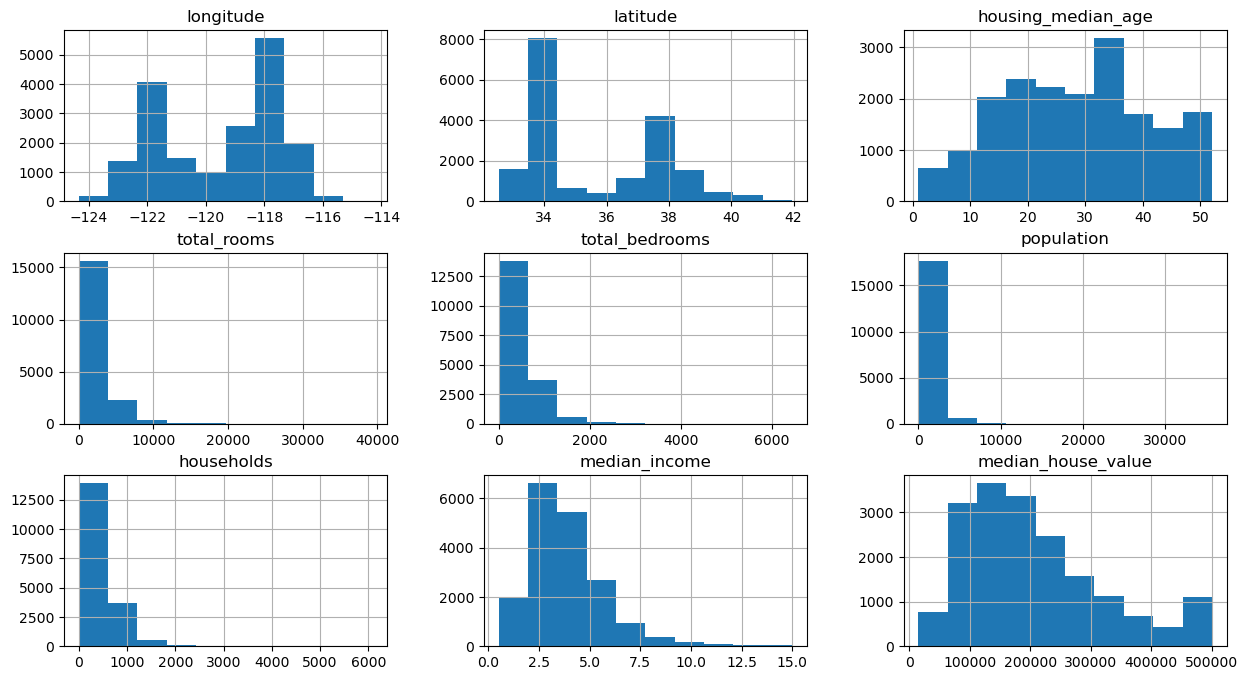

In [140]:
train_data.hist(figsize = (15, 8))    #prints out the csv as graphs. The figsize is used the space out the graphs

<AxesSubplot:>

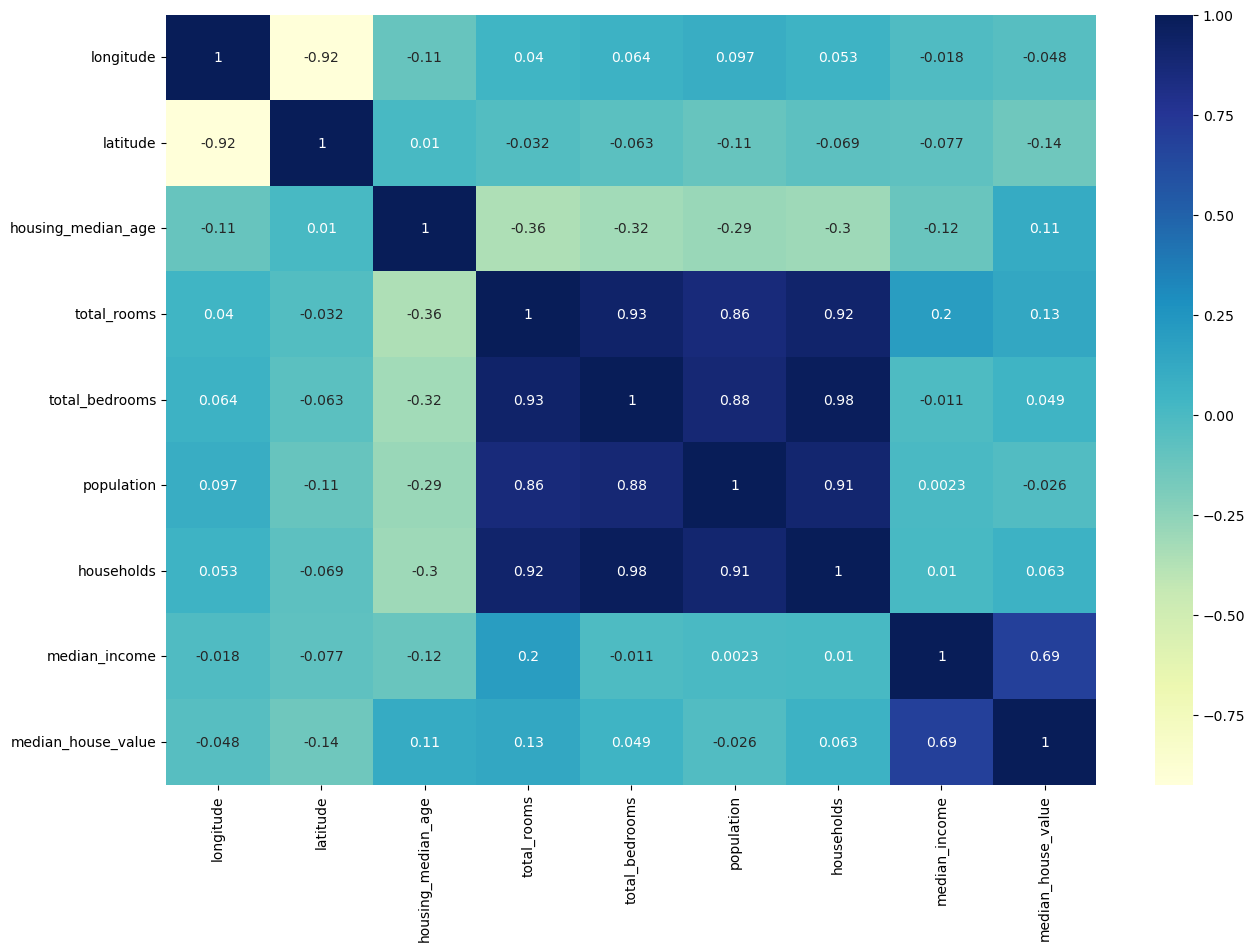

In [141]:
plt.figure(figsize=(15, 10))  # Adjust the size as needed
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")  #this shows the correlation matrix

In [142]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

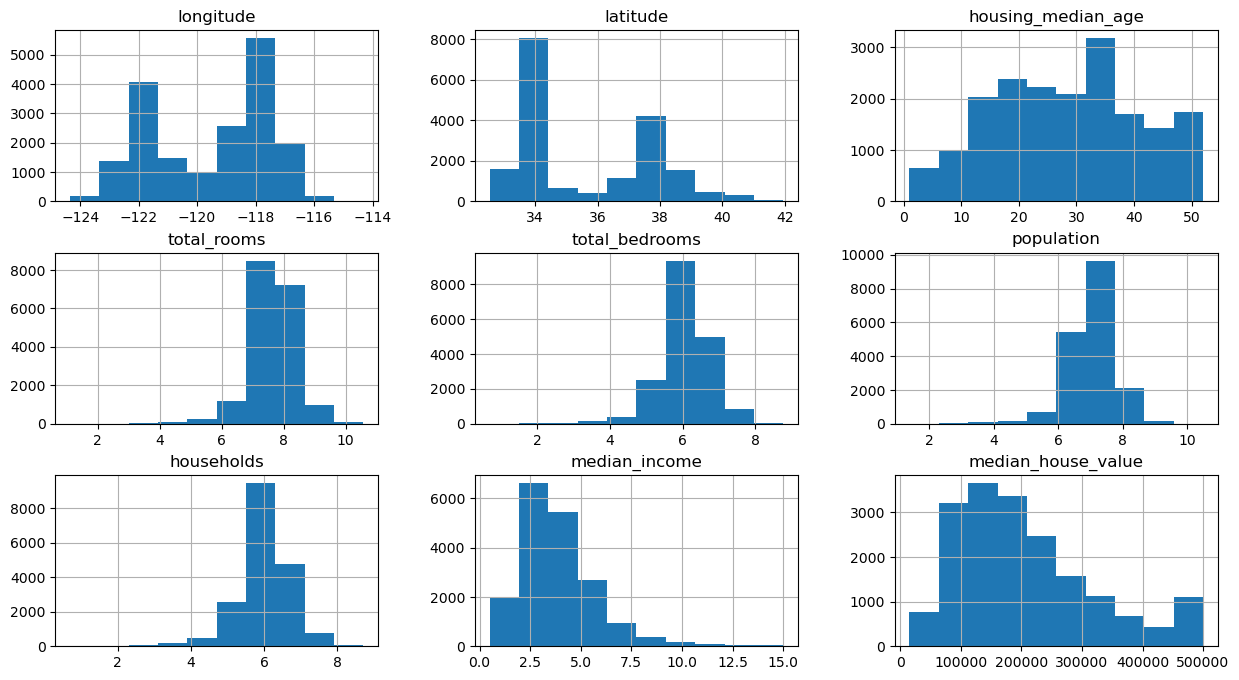

In [143]:
train_data.hist(figsize = (15,8))

In [144]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     8164
INLAND        5830
NEAR OCEAN    2367
NEAR BAY      2023
ISLAND           5
Name: ocean_proximity, dtype: int64

In [145]:
# Convert categorical variable 'ocean_proximity' into binary indicator variables,
# join them with the original DataFrame, and drop the original categorical column.
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [146]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19285,-122.75,38.43,36.0,7.377759,5.846439,6.991177,5.752573,2.6667,149100.0,1,0,0,0,0
9324,-122.51,37.96,39.0,8.102586,6.529419,7.362011,6.483107,3.6863,263800.0,0,0,0,1,0
18351,-122.18,37.41,21.0,6.942157,4.770685,5.780744,4.770685,10.7237,500001.0,0,0,0,0,1
6354,-117.96,34.14,27.0,7.706163,6.297109,7.192182,6.261492,2.5275,151700.0,0,1,0,0,0
12968,-121.33,38.70,15.0,7.708411,6.045005,6.912743,6.035481,2.7868,117800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13326,-117.66,34.05,36.0,7.758761,6.255750,7.668094,6.261492,2.3347,104000.0,0,1,0,0,0
7916,-118.08,33.87,23.0,7.838738,6.315358,7.607381,6.322565,4.1406,200800.0,1,0,0,0,0
17827,-121.88,37.37,3.0,8.396381,6.735780,7.847763,6.687109,6.0959,272700.0,1,0,0,0,0
5217,-118.23,33.95,37.0,7.889084,6.510258,7.960673,6.527958,0.6831,87500.0,1,0,0,0,0


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

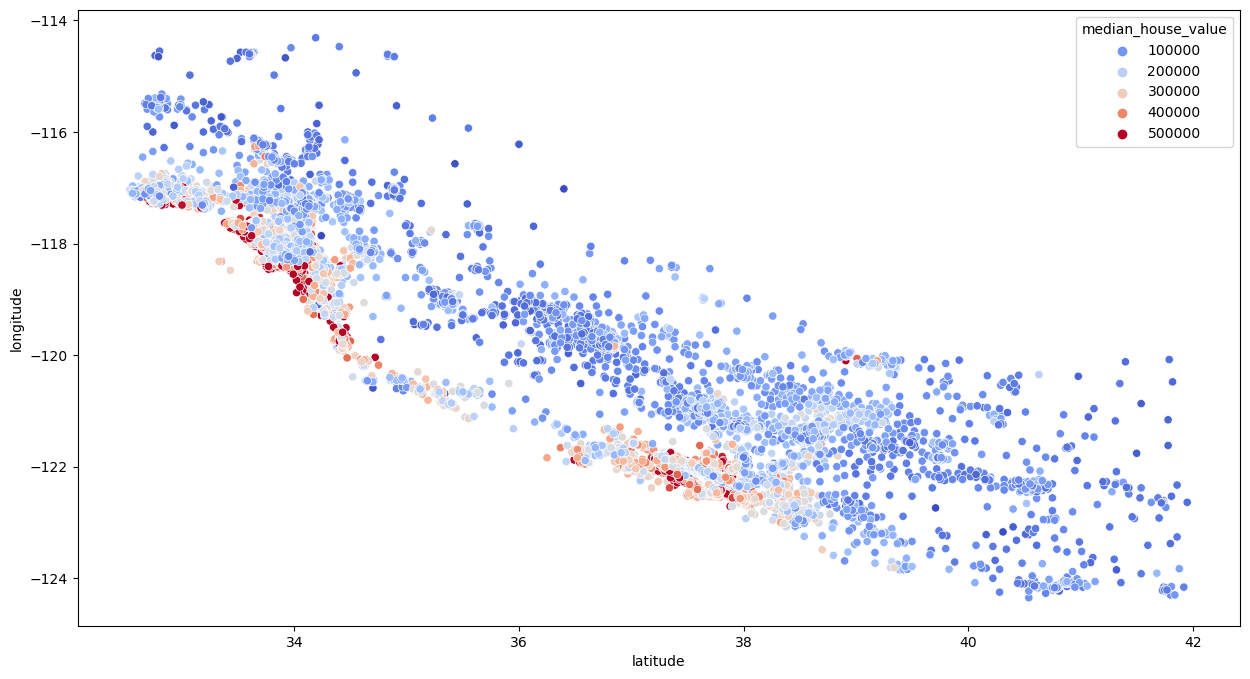

In [147]:
plt.figure(figsize = (15, 8))
# Create a scatter plot of latitude vs. longitude, coloring points by median_house_value
sns.scatterplot(x='latitude', y = 'longitude', data=train_data, 
                hue = "median_house_value", palette="coolwarm")
#the more red the dots are the more expensive the houses are

In [148]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

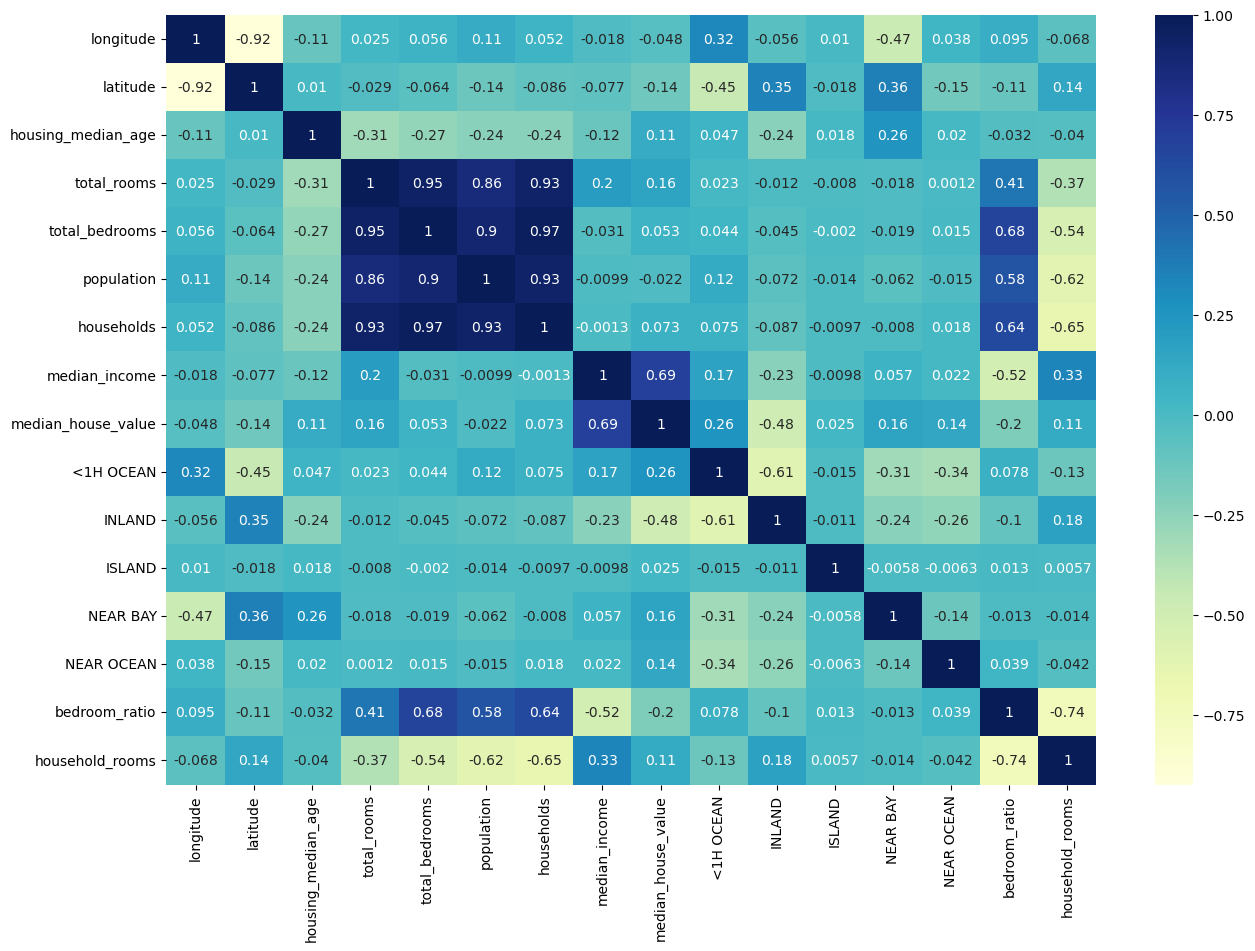

In [149]:
plt.figure(figsize=(15, 10))  # Adjust the size as needed
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")  #this shows the correlation matrix